In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyt
from nltk.corpus import stopwords
import wikipediaapi
wiki=wikipediaapi.Wikipedia('en')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words('english'))
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

### First we have to create our required dataframe with features and target column,for that we have taken sample of 5014 articles  names and thier class.From this we are going to make our features using wikipediapi library

In [2]:
df=pd.read_csv('articlesnew1.csv')
df

,Names,Class
0,History_of_biology,FA
1,Canberra,FA
2,Edward_II_of_England,FA
3,MTR,FA
4,CM_Punk,FA
...,...,...
5010,Parkland_Highway,NFA
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA
5012,Nako,NFA
5013,Metro_Ecatepec,NFA


In [3]:
df['Class'].value_counts()

FA     2508
NFA    2507
Name: Class, dtype: int64

In [4]:
df['no_of_categories']=df['Names'].apply(lambda x:len((wiki.page(x).categories)))

In [5]:
df

,Names,Class,no_of_categories
0,History_of_biology,FA,10
1,Canberra,FA,50
2,Edward_II_of_England,FA,50
3,MTR,FA,36
4,CM_Punk,FA,57
...,...,...,...
5010,Parkland_Highway,NFA,9
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0
5012,Nako,NFA,9
5013,Metro_Ecatepec,NFA,13


In [6]:
df[df['no_of_categories']==0]

,Names,Class,no_of_categories
405,AdS_CFT_correspondence,FA,0
913,History of Lithuania (1219,FA,0
914,1295),FA,0
915,History of Poland (1945,FA,0
916,1989),FA,0
...,...,...,...
4956,Nobilus_Comments,NFA,0
4963,Paangal,NFA,0
4976,1949_Sun_Bowl_controversy_GA1,NFA,0
4988,List_of_ethnic_slurs_Archive_4,NFA,0


In [8]:
df['no_of_sections']=df['Names'].apply(lambda x:len((wiki.page(x).sections)))

In [9]:
df

,Names,Class,no_of_categories,no_of_sections
0,History_of_biology,FA,10,13
1,Canberra,FA,50,13
2,Edward_II_of_England,FA,50,16
3,MTR,FA,36,13
4,CM_Punk,FA,57,11
...,...,...,...,...
5010,Parkland_Highway,NFA,9,4
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0
5012,Nako,NFA,9,3
5013,Metro_Ecatepec,NFA,13,2


In [10]:
df['Text']=df['Names'].apply(lambda x:(wiki.page(x).text))

In [11]:
df

,Names,Class,no_of_categories,no_of_sections,Text
0,History_of_biology,FA,10,13,The history of biology traces the study of the...
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),..."
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b..."
...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r..."
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol..."


In [12]:
df['no_of_characters']=df['Text'].apply(lambda x:len(x))

In [13]:
df['no_of_words']=df['Text'].apply(lambda x:len(word_tokenize(x)))

In [14]:
df

,Names,Class,no_of_categories,no_of_sections,Text,no_of_characters,no_of_words
0,History_of_biology,FA,10,13,The history of biology traces the study of the...,49899,8205
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...,62760,11146
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),...",74472,13622
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...,59749,10969
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b...",65128,12418
...,...,...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r...",3348,636
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,,0,0
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...,1060,212
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol...",1039,196


In [15]:
def stopwor(x):
    a=[]
    b=word_tokenize(x)
    for i in b:
        if i.casefold() in stop_words:
                   a.append(i)
    return(len(a))        
            
    

In [16]:
df['no_of_stopwords']=df['Text'].apply(lambda x:stopwor(x))

In [17]:
df

,Names,Class,no_of_categories,no_of_sections,Text,no_of_characters,no_of_words,no_of_stopwords
0,History_of_biology,FA,10,13,The history of biology traces the study of the...,49899,8205,2815
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...,62760,11146,3682
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),...",74472,13622,5138
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...,59749,10969,3518
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b...",65128,12418,4245
...,...,...,...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r...",3348,636,158
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,,0,0,0
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...,1060,212,27
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol...",1039,196,59


In [18]:
def nounplace(x):
    a=[]
    b=word_tokenize(x)
    c=0
    d=nltk.pos_tag(b)
    for i in range(len(d)):
              if d[i][1]=='NNP'or d[i][1]=='NN'or d[i][1]=='NNPS'or d[i][1]=='NNS':
                                                                     c=c+1
    return c
          
            

In [19]:
df['no_of_nouns']=df['Text'].apply(lambda x:nounplace(x))

In [20]:
df

,Names,Class,no_of_categories,no_of_sections,Text,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns
0,History_of_biology,FA,10,13,The history of biology traces the study of the...,49899,8205,2815,2599
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...,62760,11146,3682,3806
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),...",74472,13622,5138,3918
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...,59749,10969,3518,4062
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b...",65128,12418,4245,4344
...,...,...,...,...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r...",3348,636,158,226
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,,0,0,0,0
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...,1060,212,27,102
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol...",1039,196,59,78


In [21]:
def adj(x):
    a=[]
    b=word_tokenize(x)
    c=0
    d=nltk.pos_tag(b)
    for i in range(len(d)):
              if d[i][1]=='JJ'or d[i][1]=='JJR'or d[i][1]=='JJS':
                                         c=c+1                                 
    return c

In [22]:
df['no_of_adjective']=df['Text'].apply(lambda x:adj(x))

In [23]:
df

,Names,Class,no_of_categories,no_of_sections,Text,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective
0,History_of_biology,FA,10,13,The history of biology traces the study of the...,49899,8205,2815,2599,873
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...,62760,11146,3682,3806,874
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),...",74472,13622,5138,3918,845
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...,59749,10969,3518,4062,685
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b...",65128,12418,4245,4344,552
...,...,...,...,...,...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r...",3348,636,158,226,23
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,,0,0,0,0,0
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...,1060,212,27,102,16
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol...",1039,196,59,78,3


In [24]:
dt=df['Text']
dn=df['Names']


In [25]:
def adver(x):
    a=[]
    b=word_tokenize(x)
    c=0
    d=nltk.pos_tag(b)
    for i in range(len(d)):
              if d[i][1]=='RB'or d[i][1]=='RBR'or d[i][1]=='RBS':
                                         c=c+1                                 
    return c

In [26]:
df['no_of_adverbs']=df['Text'].apply(lambda x:adver(x))

In [27]:
def ver(x):
    a=[]
    b=word_tokenize(x)
    c=0
    d=nltk.pos_tag(b)
    for i in range(len(d)):
              if d[i][1]=='VB'or d[i][1]=='VBD'or d[i][1]=='VBG'or d[i][1]=='VBN'or d[i][1]=='VBP'or d[i][1]=='VBZ' :
                                                                            c=c+1                                 
    return c

In [28]:
df['no_of_verbs']=df['Text'].apply(lambda x:ver(x))

In [29]:
df

,Names,Class,no_of_categories,no_of_sections,Text,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective,no_of_adverbs,no_of_verbs
0,History_of_biology,FA,10,13,The history of biology traces the study of the...,49899,8205,2815,2599,873,248,870
1,Canberra,FA,50,13,Canberra ( (listen) KAN-bər-ə; Ngunnawal: Ngam...,62760,11146,3682,3806,874,276,1218
2,Edward_II_of_England,FA,50,16,"Edward II (25 April 1284 – 21 September 1327),...",74472,13622,5138,3918,845,448,1906
3,MTR,FA,36,13,The Mass Transit Railway (MTR) is a major publ...,59749,10969,3518,4062,685,248,1316
4,CM_Punk,FA,57,11,"Phillip Jack Brooks (born October 26, 1978), b...",65128,12418,4245,4344,552,251,1522
...,...,...,...,...,...,...,...,...,...,...,...,...
5010,Parkland_Highway,NFA,9,4,"Alberta Provincial Highway No. 16A, commonly r...",3348,636,158,226,23,10,59
5011,List_of_Indian_inventions_and_discoveries_Arch...,NFA,0,0,,0,0,0,0,0,0,0
5012,Nako,NFA,9,3,Nako may refer to:\n\nPeople\nRudin Nako (born...,1060,212,27,102,16,1,2
5013,Metro_Ecatepec,NFA,13,2,"Ecatepec (until August 25, 2008, called Tecnol...",1039,196,59,78,3,1,19


In [30]:
ds=df.drop(columns=['Names','Text'])
ds


,Class,no_of_categories,no_of_sections,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective,no_of_adverbs,no_of_verbs
0,FA,10,13,49899,8205,2815,2599,873,248,870
1,FA,50,13,62760,11146,3682,3806,874,276,1218
2,FA,50,16,74472,13622,5138,3918,845,448,1906
3,FA,36,13,59749,10969,3518,4062,685,248,1316
4,FA,57,11,65128,12418,4245,4344,552,251,1522
...,...,...,...,...,...,...,...,...,...,...
5010,NFA,9,4,3348,636,158,226,23,10,59
5011,NFA,0,0,0,0,0,0,0,0,0
5012,NFA,9,3,1060,212,27,102,16,1,2
5013,NFA,13,2,1039,196,59,78,3,1,19


## Thus we created our required dataframe with feature columns and target(class column)

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015 entries, 0 to 5014
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Class             5015 non-null   object
 1   no_of_categories  5015 non-null   int64 
 2   no_of_sections    5015 non-null   int64 
 3   no_of_characters  5015 non-null   int64 
 4   no_of_words       5015 non-null   int64 
 5   no_of_stopwords   5015 non-null   int64 
 6   no_of_nouns       5015 non-null   int64 
 7   no_of_adjective   5015 non-null   int64 
 8   no_of_adverbs     5015 non-null   int64 
 9   no_of_verbs       5015 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 391.9+ KB


## lets find the outliers and impute them column by column

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_categories'>

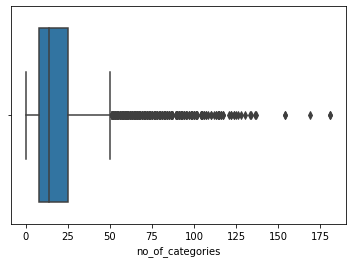

In [32]:
sns.boxplot(ds.no_of_categories)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_characters'>

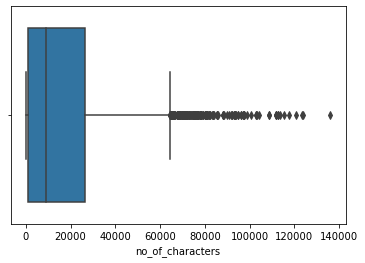

In [33]:
sns.boxplot(ds.no_of_characters)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_sections'>

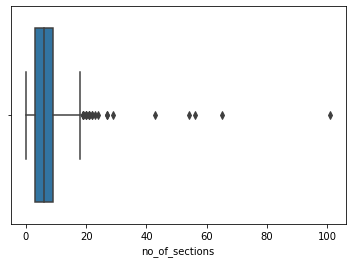

In [34]:
sns.boxplot(ds.no_of_sections)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_words'>

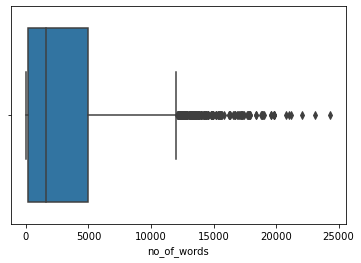

In [35]:
sns.boxplot(ds.no_of_words)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_stopwords'>

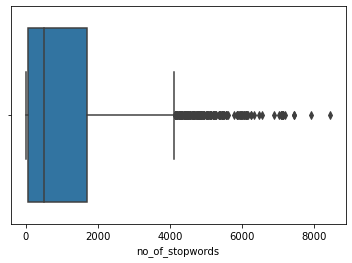

In [36]:
sns.boxplot(ds.no_of_stopwords)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_adjective'>

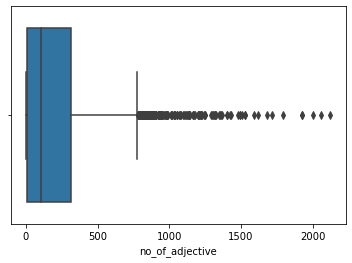

In [37]:
sns.boxplot(ds.no_of_adjective)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_nouns'>

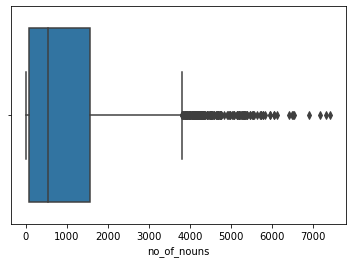

In [38]:
sns.boxplot(ds.no_of_nouns)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_adverbs'>

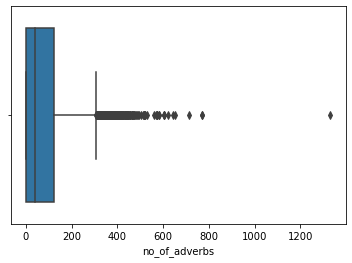

In [39]:
sns.boxplot(ds.no_of_adverbs)

## imputing column outliers by mean of column

In [40]:
#function for imputing
def outliremo(x):
    q3=ds[x].quantile(.75)
    q1=ds[x].quantile(.25)
    iqr=q3-q1
    ds[x][(ds[x]>(q3+iqr))|(ds[x]<(q1-iqr))]=ds[x][(ds[x]<=(q3+iqr)) & (ds[x]>=(q1-iqr))].mean() 
    return ds[x]

In [41]:
ds.columns

Index(['Class', 'no_of_categories', 'no_of_sections', 'no_of_characters',
       'no_of_words', 'no_of_stopwords', 'no_of_nouns', 'no_of_adjective',
       'no_of_adverbs', 'no_of_verbs'],
      dtype='object')

In [42]:
for i in [x for x in ds.columns if x!='Class']:
    outliremo(i)
    
    

C:\Users\sakth\AppData\Local\Temp\ipykernel_19216\3372062217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[x][(ds[x]>(q3+iqr))|(ds[x]<(q1-iqr))]=ds[x][(ds[x]<=(q3+iqr)) & (ds[x]>=(q1-iqr))].mean()


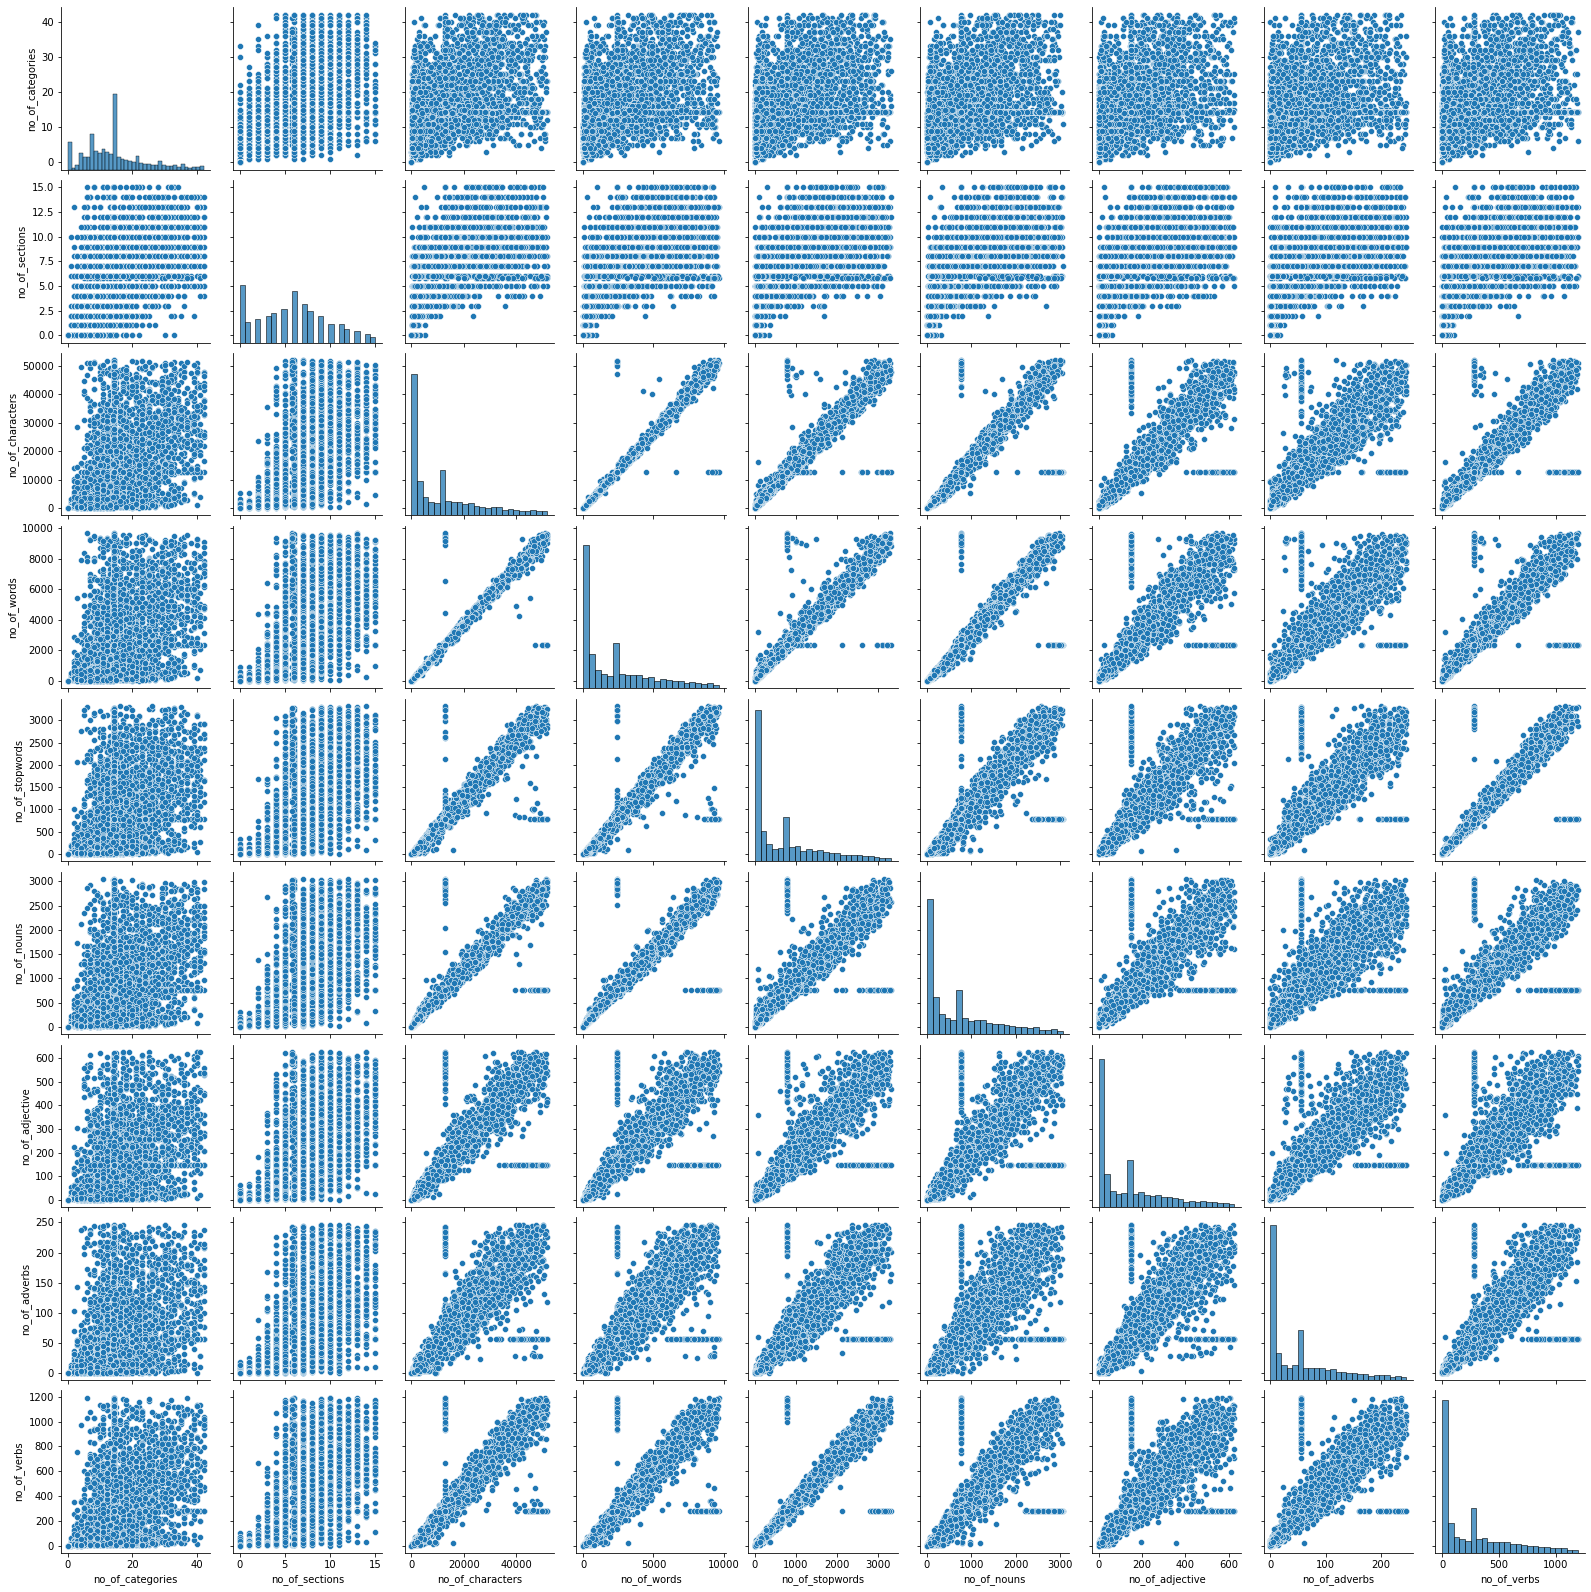

In [43]:
#relation between the features
sns.pairplot(ds)

In [44]:
ds.corr()

,no_of_categories,no_of_sections,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective,no_of_adverbs,no_of_verbs
no_of_categories,1.000000,0.546200,0.518435,0.517970,0.518741,0.519114,0.488692,0.479014,0.501831
no_of_sections,0.546200,1.000000,0.663214,0.668428,0.661137,0.674438,0.654251,0.639331,0.654723
no_of_characters,0.518435,0.663214,1.000000,0.981190,0.958034,0.940919,0.901505,0.860443,0.914621
no_of_words,0.517970,0.668428,0.981190,1.000000,0.960063,0.946483,0.894167,0.862791,0.920629
no_of_stopwords,0.518741,0.661137,0.958034,0.960063,1.000000,0.917732,0.885032,0.876743,0.935962
no_of_nouns,0.519114,0.674438,0.940919,0.946483,0.917732,1.000000,0.870185,0.829472,0.889659
no_of_adjective,0.488692,0.654251,0.901505,0.894167,0.885032,0.870185,1.000000,0.839405,0.847237
no_of_adverbs,0.479014,0.639331,0.860443,0.862791,0.876743,0.829472,0.839405,1.000000,0.860769
no_of_verbs,0.501831,0.654723,0.914621,0.920629,0.935962,0.889659,0.847237,0.860769,1.000000


# Lets see the relation of each feature with the target 

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015 entries, 0 to 5014
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5015 non-null   object 
 1   no_of_categories  5015 non-null   float64
 2   no_of_sections    5015 non-null   float64
 3   no_of_characters  5015 non-null   float64
 4   no_of_words       5015 non-null   float64
 5   no_of_stopwords   5015 non-null   float64
 6   no_of_nouns       5015 non-null   float64
 7   no_of_adjective   5015 non-null   float64
 8   no_of_adverbs     5015 non-null   float64
 9   no_of_verbs       5015 non-null   float64
dtypes: float64(9), object(1)
memory usage: 391.9+ KB


<AxesSubplot:xlabel='Class', ylabel='no_of_categories'>

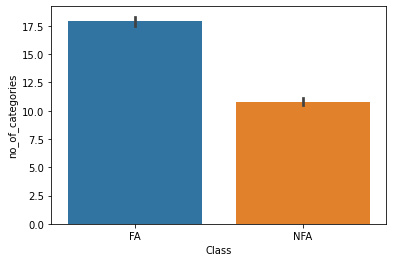

In [46]:
sns.barplot(x=ds['Class'],y=ds['no_of_categories'])

<AxesSubplot:xlabel='Class', ylabel='no_of_sections'>

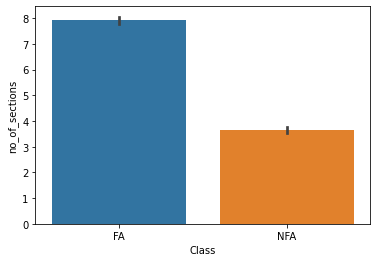

In [47]:
sns.barplot(x=ds['Class'],y=ds['no_of_sections'])

<AxesSubplot:xlabel='Class', ylabel='no_of_characters'>

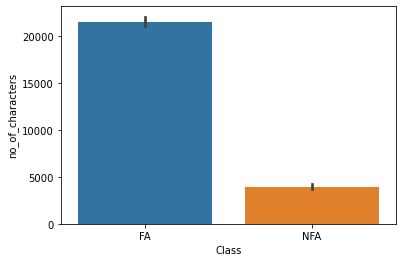

In [48]:
sns.barplot(x=ds['Class'],y=ds['no_of_characters'])

<AxesSubplot:xlabel='Class', ylabel='no_of_words'>

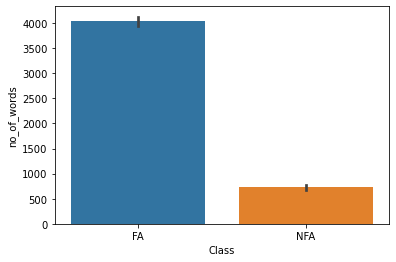

In [49]:
sns.barplot(x=ds['Class'],y=ds['no_of_words'])

<AxesSubplot:xlabel='Class', ylabel='no_of_stopwords'>

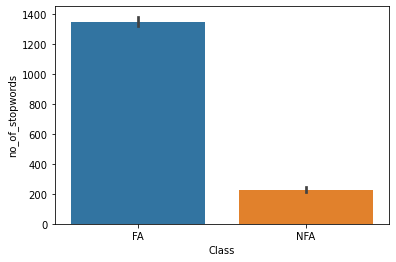

In [50]:
sns.barplot(x=ds['Class'],y=ds['no_of_stopwords'])

<AxesSubplot:xlabel='Class', ylabel='no_of_nouns'>

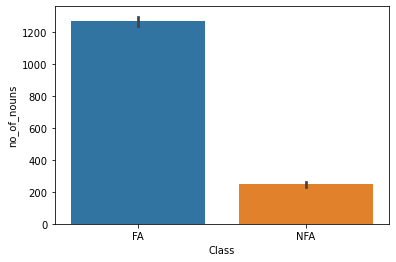

In [51]:
sns.barplot(x=ds['Class'],y=ds['no_of_nouns'])

<AxesSubplot:xlabel='Class', ylabel='no_of_adjective'>

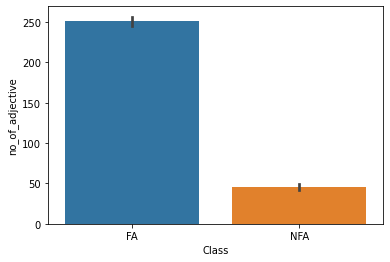

In [52]:
sns.barplot(x=ds['Class'],y=ds['no_of_adjective'])

<AxesSubplot:xlabel='Class', ylabel='no_of_adverbs'>

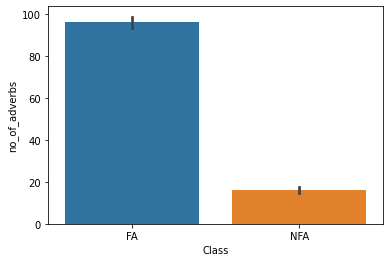

In [53]:
sns.barplot(x=ds['Class'],y=ds['no_of_adverbs'])

<AxesSubplot:xlabel='Class', ylabel='no_of_verbs'>

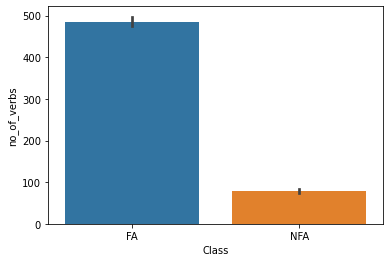

In [54]:
sns.barplot(x=ds['Class'],y=ds['no_of_verbs'])

## from the above we can see all the features have linear relation with the target(Class) so we take all the features .


In [55]:
ds['Class']=ds['Class'].replace({'FA':1,'NFA':0})

In [56]:
ds

,Class,no_of_categories,no_of_sections,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective,no_of_adverbs,no_of_verbs
0,1,10.000000,13.000000,49899.000000,8205.000000,2815.000000,2599.000000,148.215077,56.023491,870.000000
1,1,14.367614,13.000000,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
2,1,14.367614,5.792914,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
3,1,36.000000,13.000000,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
4,1,14.367614,11.000000,12719.967192,2379.393573,789.301556,757.440689,552.000000,56.023491,282.161046
...,...,...,...,...,...,...,...,...,...,...
5010,0,9.000000,4.000000,3348.000000,636.000000,158.000000,226.000000,23.000000,10.000000,59.000000
5011,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5012,0,9.000000,3.000000,1060.000000,212.000000,27.000000,102.000000,16.000000,1.000000,2.000000
5013,0,13.000000,2.000000,1039.000000,196.000000,59.000000,78.000000,3.000000,1.000000,19.000000


## Let we take input features as x,target feature(Class) as y

In [57]:
x=ds.drop(columns=['Class'])
y=ds['Class']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=30)

In [59]:
from collections import Counter
Counter(y_train)

Counter({0: 1872, 1: 1889})

## let we fit and predict and find the model which gives high accuracy

In [60]:
#1.RandomForestClssifier
model=RandomForestClassifier()
kf=KFold(n_splits=10)
params=[{'max_depth':[2,5,8,10],
        'n_estimators':[500,800,1000],
        'criterion':['entropy']}]
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
gv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=800)

In [61]:
model=gv.best_estimator_
model.fit(x_train,y_train)
accuracy_score(y_test,model.predict(x_test))

0.9154704944178629

In [62]:
#AdaboostClassifier
model=AdaBoostClassifier()
kf=KFold(n_splits=10)
params=[{
        'n_estimators':[800,1000,1300],
        'learning_rate':[.3,.1,.03]}]
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
gv.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=1300)

In [63]:
model2=gv.best_estimator_
model2.fit(x_train,y_train)
accuracy_score(y_test,model2.predict(x_test))

0.9035087719298246

In [64]:
#3logisticRegression
model=LogisticRegression()
kf=KFold(n_splits=10)
params=[{
         'solver':['saga'],
        'max_iter':[1000,2000],
        'penalty':['elasticnet'],
        'tol':[.000001,.0000001],
        'l1_ratio':[.3,.2,.7]}]
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
gv.best_estimator_

C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegression(l1_ratio=0.3, max_iter=2000, penalty='elasticnet',
                   solver='saga', tol=1e-06)

In [65]:
model3=gv.best_estimator_
model3.fit(x_train,y_train)
accuracy_score(y_test,model3.predict(x_test))

C:\Users\sakth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7177033492822966

In [66]:
x_train=MinMaxScaler(feature_range=[0,1]).fit_transform(x_train)
x_test=MinMaxScaler(feature_range=[0,1]).fit_transform(x_test)

In [67]:
#4supportvectorClassification
model=SVC()
kf=KFold(n_splits=10)
params=[{
        'kernel':['linear', 'poly', 'rbf'],
        'tol':[.01,.0001,.000001]}]
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
gv.best_estimator_

SVC(tol=0.01)

In [68]:
model4=gv.best_estimator_
model4.fit(x_train,y_train)
accuracy_score(y_test,model4.predict(x_test))

0.8851674641148325

In [69]:
#from the we can see that SVC has more accuracy than LogisticRegression()


In [70]:
#In the above the model is RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)
model=RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [71]:
model.feature_importances_

array([0.07716325, 0.01839765, 0.11707178, 0.1701396 , 0.17784422,
       0.05914831, 0.04161578, 0.08786288, 0.25075653])

In [72]:
x

,no_of_categories,no_of_sections,no_of_characters,no_of_words,no_of_stopwords,no_of_nouns,no_of_adjective,no_of_adverbs,no_of_verbs
0,10.000000,13.000000,49899.000000,8205.000000,2815.000000,2599.000000,148.215077,56.023491,870.000000
1,14.367614,13.000000,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
2,14.367614,5.792914,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
3,36.000000,13.000000,12719.967192,2379.393573,789.301556,757.440689,148.215077,56.023491,282.161046
4,14.367614,11.000000,12719.967192,2379.393573,789.301556,757.440689,552.000000,56.023491,282.161046
...,...,...,...,...,...,...,...,...,...
5010,9.000000,4.000000,3348.000000,636.000000,158.000000,226.000000,23.000000,10.000000,59.000000
5011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5012,9.000000,3.000000,1060.000000,212.000000,27.000000,102.000000,16.000000,1.000000,2.000000
5013,13.000000,2.000000,1039.000000,196.000000,59.000000,78.000000,3.000000,1.000000,19.000000


## we can see that feature importance of order 1.no_of_verbs,2.no_of_stopwords,3.no_of_words	,4.no_of_characters	,5.no_of_adverbs,6.no_of_categories	,7.no_of_nouns,8.no_of_adjective,9.no_of_sections

In [74]:
#let we predict using only one feature by using the best model
z=ds['no_of_verbs']
z_train,z_test,y_train,y_test=train_test_split(z,y,test_size=.25,random_state=2)

In [75]:
z_test

4142     19.0
700     115.0
1202    176.0
4336     10.0
3566    358.0
        ...  
3773     34.0
1479    138.0
3685    114.0
477     301.0
3850     44.0
Name: no_of_verbs, Length: 1254, dtype: float64

In [76]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)
model.fit(np.array(z_train).reshape(3761,1),y_train)

accuracy_score(y_test,model.predict(np.array(z_test).reshape(1254,1)))

0.8963317384370016

## from this we can see that we get less accuracy while using single feature for prediction
since by using single feature we get 0.8963317384370016 accuracyscore
but by using all features we get 0.9154704944178629 accuracy score